# Hypothesis Testing

## Case study: Quality Associates
The consultancy Quality Associates (QA) advises its clients about sampling and statistical procedures that can be used to control their manufacturing processes. One particular client gave QA a sample of 1,000 observations taken during a time when the client’s process was operating satisfactorily. The sample standard deviation for these data was 0.21; hence, with so much data, the population standard deviation was assumed to be 0.21. QA then suggested that random samples of size 30 be taken periodically to monitor the process on an ongoing basis. By analyzing the new samples, the client could quickly learn whether the process was operating satisfactorily, and if necessary take corrective action.

In [1]:
import pandas as pd

Let's import our dataset

In [2]:
df=pd.read_csv('air-quality.csv')

In [3]:
df.describe()

,Sample 1,Sample 2,Sample 3,Sample 4
count,30.000000,30.000000,30.000000,30.000000
mean,11.958667,12.028667,11.889000,12.081333
std,0.220356,0.220356,0.207171,0.206109
min,11.520000,11.590000,11.360000,11.640000
25%,11.812500,11.882500,11.752500,11.982500
50%,11.955000,12.025000,11.920000,12.080000
75%,12.145000,12.215000,11.997500,12.227500
max,12.320000,12.390000,12.220000,12.470000


The design specification indicated that the mean for the process should be 12.0. The hypothesis test suggested by QA follows.

$$H_0: \mu = 12.0$$

$$H_1: \mu \neq 12.0$$  

Corrective action will be taken any time $H_0$ is rejected.

The data set ‘Quality’ on the online platform contains data from four samples, each of size 30, collected at hourly intervals during the first day of operation of the new statistical control procedure.

Questions:
1. Do a hypothesis test for each sample, using $\alpha = 0.01$, and determine whether corrective action should be taken. Provide the test statistic and p-value for each test.
2. Compute the standard deviation for each of the four samples. Does the assumption of 0.21 for the population standard deviation appear reasonable?
3. Compute limits for the sample mean $\bar{X}$ around $\mu = 12.0$ such that, as long as a new sample mean is within those limits, the process will be considered to be operating satisfactorily. These limits are referred to as upper and lower control limits for quality control purposes.
4. Discuss the implications of changing the level of significance $\alpha$ to a larger value. What mistake or error could increase if the level of significance is increased?

### Question 1:  Do a hypothesis test for each sample, using $\alpha = 0.01$, and determine whether corrective action should be taken. Provide the test statistic and p-value for each test.

Let's write an function to do test!

In [13]:
import numpy as np
import scipy.stats as stats

def hypothesis_test_one_sample_mean(df, column, hypothesized_mean, alpha=0.05):
    """
    Perform a one-sample Z-test on a data column in a DataFrame.
    
    Parameters:
        df (DataFrame): The data frame containing the data.
        column (str): The name of the column to test.
        hypothesized_mean (float): The population mean to test against.
        alpha (float): Significance level. Default is 0.05.
        
    Returns:
        tuple: Z-statistic, p-value, reject null hypothesis (True/False)
    """
    
    # Extract data and calculate statistics
    data = df[column]
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    n = len(data)
    
    # Calculate the Z-statistic
    z_statistic = (sample_mean - hypothesized_mean) / (sample_std / np.sqrt(n))
    
    # Calculate the two-tailed p-value
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))
    
    # Determine whether to reject the null hypothesis
    reject_null = p_value < alpha
    
    return z_statistic, p_value, reject_null

In [14]:
# Hypothesized population mean according to our case study
hypothesized_mean = 12

# Significance level
alpha = 0.01

# Perform the hypothesis test for all columns
for col in df.columns:
    z_stat, p_val, reject_null = hypothesis_test_one_sample_mean(df, col, hypothesized_mean, alpha)
    print('This is', str(col))
    print(f"Z-statistic: {z_stat}")
    print(f"P-value: {p_val}")
    print(f"Reject null hypothesis: {reject_null}")

This is Sample 1
Z-statistic: -1.0273918375852567
P-value: 0.3042359934361458
Reject null hypothesis: False
This is Sample 2
Z-statistic: 0.7125459518737836
P-value: 0.4761267668347715
Reject null hypothesis: False
This is Sample 3
Z-statistic: -2.9346444686029636
P-value: 0.0033393006290902694
Reject null hypothesis: True
This is Sample 4
Z-statistic: 2.161385554363501
P-value: 0.030665569040311036
Reject null hypothesis: False


Only sample 3 leads to the rejection of the hypothesis $H_0: \mu = 12$.  Hence, corrective action is warranted for sample 3.  The other samples indicate $H_0$ cannot be rejected and so from all we can tell, the process is operating satisfactorily.  Sample 3 with $\bar{X} = 11.889$ shows the process is operating below the desired mean.  Sample 4 with $\bar{X} = 12.0813$ is on the high side, but the p-value of 0.031 is not sufficient to reject $H_0$.

### Question 2: Compute the standard deviation for each of the four samples. Does the assumption of 0.21 for the population standard deviation appear reasonable?

In [11]:
df.describe()

,Sample 1,Sample 2,Sample 3,Sample 4
count,30.000000,30.000000,30.000000,30.000000
mean,11.958667,12.028667,11.889000,12.081333
std,0.220356,0.220356,0.207171,0.206109
min,11.520000,11.590000,11.360000,11.640000
25%,11.812500,11.882500,11.752500,11.982500
50%,11.955000,12.025000,11.920000,12.080000
75%,12.145000,12.215000,11.997500,12.227500
max,12.320000,12.390000,12.220000,12.470000


The sample standard deviations for all four samples are in the 0.20 to 0.22 range.  It appears that the process population standard deviation assumption of 0.21 is good.

### Question 3. Compute limits for the sample mean $\bar{X}$ around $\mu = 12.0$ such that, as long as a new sample mean is within those limits, the process will be considered to be operating satisfactorily. These limits are referred to as upper and lower control limits for quality control purposes.

In [12]:
from scipy.stats import norm 

In [17]:
alpha = 0.01

In [19]:
z_value = norm.ppf(alpha/2)
print(z_value)

-2.575829303548901


In [20]:
sigma = 0.21
SE = sigma / np.sqrt(30)
print(SE)

0.03834057902536163


Therefore, we can have the interval:
- Upper Control Limit  = 12 + 2.576 (0.0383)  = 12.0987
- Lower Control Limit  = 12 - 2.576 (0.0383)  = 11.9013

Write a function, we can also do it for our dataframe

In [23]:
import numpy as np
import scipy.stats as stats

def confidence_interval_known_sigma(df, column, sigma, confidence_level=0.95):
    """
    Calculate the confidence interval for a population mean with known sigma.
    
    Parameters:
        df (DataFrame): The data frame containing the data.
        column (str): The name of the column to calculate the confidence interval for.
        sigma (float): Known population standard deviation.
        confidence_level (float): Desired confidence level. Default is 0.95.
        
    Returns:
        tuple: Lower bound, Upper bound of the confidence interval
    """
    
    # Extract data and calculate sample mean
    data = df[column]
    sample_mean = np.mean(data)
    n = len(data)
    
    # Calculate the Z-value for the given confidence level
    z_value = stats.norm.ppf((1 + confidence_level) / 2)
    
    # Calculate the margin of error
    margin_of_error = z_value * (sigma / np.sqrt(n))
    
    # Calculate the confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    return lower_bound, upper_bound

In [26]:
for col in df.columns:
    # Calculate the confidence interval
    lower, upper = confidence_interval_known_sigma(df, col, sigma, 1-alpha)
    print(f"Confidence Interval ({(1-alpha) * 100}%): ({lower}, {upper})")

Confidence Interval (99.0%): (11.85990787969811, 12.057425453635226)
Confidence Interval (99.0%): (11.929907879698114, 12.12742545363523)
Confidence Interval (99.0%): (11.790241213031441, 11.987758786968557)
Confidence Interval (99.0%): (11.982574546364777, 12.180092120301893)


As long as a sample mean $\bar{X}$ is between these two limits, the process is in control and no corrective action is required.  Note that sample 3 with a mean of 11.889 shows corrective action is necessary because the sample mean is outside the control limits.
- From the view of general confidence interval, (11.9013, 12.0987) doesn't contain 11.889.
- From the view of sample 3's own confidence interval (11.790241213031441, 11.987758786968557) doesn't contain 12

### Question 4. Discuss the implications of changing the level of significance $\alpha$ to a larger value. What mistake or error could increase if the level of significance is increased?

Increasing the level of significance will cause the null hypothesis to be rejected more often.  While this may mean quicker corrective action when the process is out of control, it also means that there will be a higher error probability of stopping the process and attempting corrective action when the process is operating satisfactorily.  This would be an increase in the probability of a making a Type I error.

**Can you change the significance level and re-run the above code? And what can you observe?**

# Further Look at both $\alpha$ and $\beta$

In [2]:
from scipy.stats import norm
import math

# Given values
alpha = 0.05  # Significance level
mu_0 = 18  # Population mean under H0
mu_real = 17  # "Real" population mean under Ha
s = 4  # Sample standard deviation
n = 50  # Sample size

# Calculate critical Z value for alpha
z_critical = norm.ppf(1 - alpha)

# Calculate corresponding critical sample mean
x_critical = mu_0 + z_critical * (s / math.sqrt(n))

# Calculate beta: probability of not rejecting H0 when Ha is true
# We need to standardize x_critical under the distribution of the sample mean if Ha is true
z_beta = (x_critical - mu_real) / (s / math.sqrt(n))
beta = norm.cdf(z_beta)

# Alpha is already known as it's the significance level we set (0.05)
print(f"Alpha (Type I error): {alpha}")
print(f"Critical value of sample mean for alpha: {x_critical}")
print(f"Beta (Type II error): {beta}")

Alpha (Type I error): 0.05
Critical value of sample mean for alpha: 18.93046972294134
Beta (Type II error): 0.9996782927232838


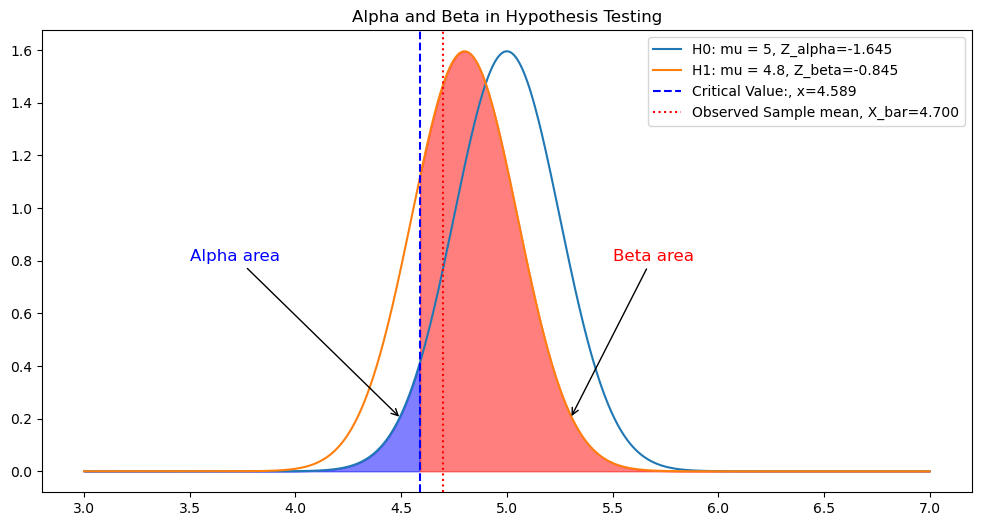

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
# mu0=5 is the original true mean
# mu1=4.8 is the assumed true mean when calculating beta 
# observed sample mean is 4.7
mu0, mu1, sigma = 5, 4.8, 1.5
x_bar = 4.7
n = 36

# Z-scores
z_alpha = stats.norm.ppf(0.05)

# Z-statistic (threshold to reject or accept value for the observed sample mean)
z_statistic = mu0 + z_alpha * (sigma/np.sqrt(n)) 

# z_beta value
z_beta = (z_statistic - mu1) / (sigma/np.sqrt(n))


# Distributions
x = np.linspace(3, 7, 1000)
y0 = stats.norm.pdf(x, mu0, sigma/np.sqrt(n))
y1 = stats.norm.pdf(x, mu1, sigma/np.sqrt(n))

plt.figure(figsize=(12, 6))

plt.plot(x, y0, label=f'H0: mu = 5, Z_alpha={z_alpha:.3f}')
plt.fill_between(x, y0, where=(x <= mu0 + z_alpha*(sigma/np.sqrt(n))), color='blue', alpha=0.5)

plt.plot(x, y1, label=f'H1: mu = 4.8, Z_beta={z_beta:.3f}')
plt.fill_between(x, y1, where=(x >= z_statistic), color='red', alpha=0.5)


# Add dashed line at x = 4.589
plt.axvline(x=z_statistic, color='blue', linestyle='--', label=f'Critical Value:, x={z_statistic:.3f}')

# Add dashed line at x = x_bar
plt.axvline(x=x_bar, color='red', linestyle=':', label=f'Observed Sample mean, X_bar={x_bar:.3f}')

# Annotations
plt.annotate('Alpha area', xy=(4.5, 0.2), xytext=(3.5, 0.8),
             arrowprops=dict(facecolor='blue', arrowstyle='->'),
             fontsize=12, color='blue')

plt.annotate('Beta area', xy=(5.3, 0.2), xytext=(5.5, 0.8),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12, color='red')

plt.legend()
plt.title('Alpha and Beta in Hypothesis Testing')
plt.show()

# Directly apply stats packages to do the test

## Test for sample mean

In [4]:
import pandas as pd
from scipy import stats

In [5]:
df=pd.read_csv('air-quality.csv')

If it needs t-test, then we can also use `test_1samp` function directly. For example:

In [10]:
mu = 12 # this is our test problem, null hypothesis
t_stat, p_val = stats.ttest_1samp(df['Sample 1'], mu)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

T-Statistic: -1.0273918375852564
P-Value: 0.3127295817114154


We can compare it with the result achieved by our previous customised function `hypothesis_test_one_sample_mean`:
```
This is Sample 1
Z-statistic: -1.0273918375852567
P-value: 0.3042359934361458
Reject null hypothesis: False
```

The difference is small, even though the previous function is doing `z-test` while this one is `t-test`. This is because the sample size is 30 (large enough to use normal), even though here it is hard to say, the population standard deviation is known or not from the data.

The tasks also can be done as a whole using for loop.

In [15]:
# Hypothesized mean
mu = 12

# Significance level
alpha = 0.01

# Loop through each column
for column in df.columns:

    # Perform one-sample t-test using ttest_1samp
    t_stat, p_val = stats.ttest_1samp(df[column], mu)

    print(f"--- {column} ---")
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value: {p_val}")

    # Make a decision based on the p-value
    if p_val < alpha:
        print(f"The result is statistically significant at α = {alpha}. Reject the null hypothesis.")
    else:
        print(f"The result is not statistically significant at α = {alpha}. Fail to reject the null hypothesis.")

--- Sample 1 ---
T-Statistic: -1.0273918375852564
P-Value: 0.3127295817114154
The result is not statistically significant at α = 0.01. Fail to reject the null hypothesis.
--- Sample 2 ---
T-Statistic: 0.7125459518737836
P-Value: 0.48182093997366904
The result is not statistically significant at α = 0.01. Fail to reject the null hypothesis.
--- Sample 3 ---
T-Statistic: -2.9346444686029636
P-Value: 0.006468822099321287
The result is statistically significant at α = 0.01. Reject the null hypothesis.
--- Sample 4 ---
T-Statistic: 2.1613855543635005
P-Value: 0.03905894729956287
The result is not statistically significant at α = 0.01. Fail to reject the null hypothesis.


Also, if we know there are many different columns with different means, then we can change the code a little bit:

In [16]:
# Create a dictionary for Hypothesized means for each column
mu_dict = {'Sample 1': 12, 'Sample 2': 12, 'Sample 3': 12, 'Sample 4': 12}

In [20]:
# Loop through each column
for column in df.columns:

    # Perform one-sample t-test using ttest_1samp (here we have difference)
    t_stat, p_val = stats.ttest_1samp(df[column], mu_dict[column])

    print(f"--- {column} ---")
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value: {p_val}")

    # Make a decision based on the p-value
    if p_val < alpha:
        print(f"The result is statistically significant at α = {alpha}. Reject the null hypothesis.")
    else:
        print(f"The result is not statistically significant at α = {alpha}. Fail to reject the null hypothesis.")

--- Sample 1 ---
T-Statistic: -1.0273918375852564
P-Value: 0.3127295817114154
The result is not statistically significant at α = 0.01. Fail to reject the null hypothesis.
--- Sample 2 ---
T-Statistic: 0.7125459518737836
P-Value: 0.48182093997366904
The result is not statistically significant at α = 0.01. Fail to reject the null hypothesis.
--- Sample 3 ---
T-Statistic: -2.9346444686029636
P-Value: 0.006468822099321287
The result is statistically significant at α = 0.01. Reject the null hypothesis.
--- Sample 4 ---
T-Statistic: 2.1613855543635005
P-Value: 0.03905894729956287
The result is not statistically significant at α = 0.01. Fail to reject the null hypothesis.


**Please change the significant level, and observe the results!**